In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df = pd.read_csv("../MACH_data/data.csv", delimiter="\t")

In [3]:
raw_df.tail()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,major
73484,2.0,17.0,9925.0,1.0,6.0,14218.0,2.0,16.0,25499.0,4.0,...,2048.0,1080.0,1,12,1,10,2,2,1,business
73485,5.0,9.0,5816.0,5.0,4.0,4368.0,1.0,15.0,7246.0,1.0,...,1440.0,900.0,1,2,3,60,2,1,2,sociology
73486,2.0,17.0,5353.0,1.0,18.0,6846.0,1.0,9.0,4920.0,1.0,...,1280.0,1024.0,1,1,1,60,2,1,3,NaN
73487,4.0,15.0,7974.0,3.0,9.0,7901.0,5.0,17.0,8647.0,3.0,...,414.0,736.0,1,3,1,10,1,1,4,Business
73488,3.0,12.0,7567.0,1.0,10.0,5766.0,5.0,13.0,37103.0,1.0,...,1366.0,768.0,1,4,1,70,2,1,4,NaN


In [4]:
pro_df = pd.read_csv("../MACH_data/data_cutoff_age18.csv")

In [5]:
pro_df.tail()

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
54713,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
54714,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
54715,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0
54716,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Buddhist,Heterosexual,Asian,Yes,Never married,4,53.0,25.0,22.0,6.0
54717,3.0,12.0,8.0,1.0,10.0,6.0,5.0,13.0,37.0,1.0,...,Christian(Catholic),Heterosexual,Other,No,Never married,4,64.0,36.0,23.0,5.0


### QA

In [108]:
col_list = list(pro_df.columns)
pos_col = []
neg_col = []

for col in col_list:
    if "P" in col and "Y" not in col:
        pos_col.append(col)
    if "N" in col:
        neg_col.append(col)
        
print(pos_col, '\n', '\n', neg_col)

['Q1_TP_notell_2u', 'Q2_TP_ppl_nd_dangun', 'Q5_VP_ppl_bad', 'Q8_VP_ppl_lazy', 'Q12_TP_trust_trouble', 'Q13_VP_ppl_criminal', 'Q15_TP_abu_good', 'Q18_VP_komsu_better', 'Q19_MP_anrocksa_ok', 'Q20_VP_money_good'] 
 
 ['Q3_TN_do_moral', 'Q4_VN_ppl_good', 'Q6_TN_hnsty_best', 'Q7_TN_lying_bad', 'Q9_MN_humble_hnst', 'Q10_TN_hnstly_ask', 'Q11_VN_leader_clean', 'Q14_VN_ppl_brave', 'Q16_TN_ppl_good', 'Q17_VN_ppl_notbad']


#### all

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


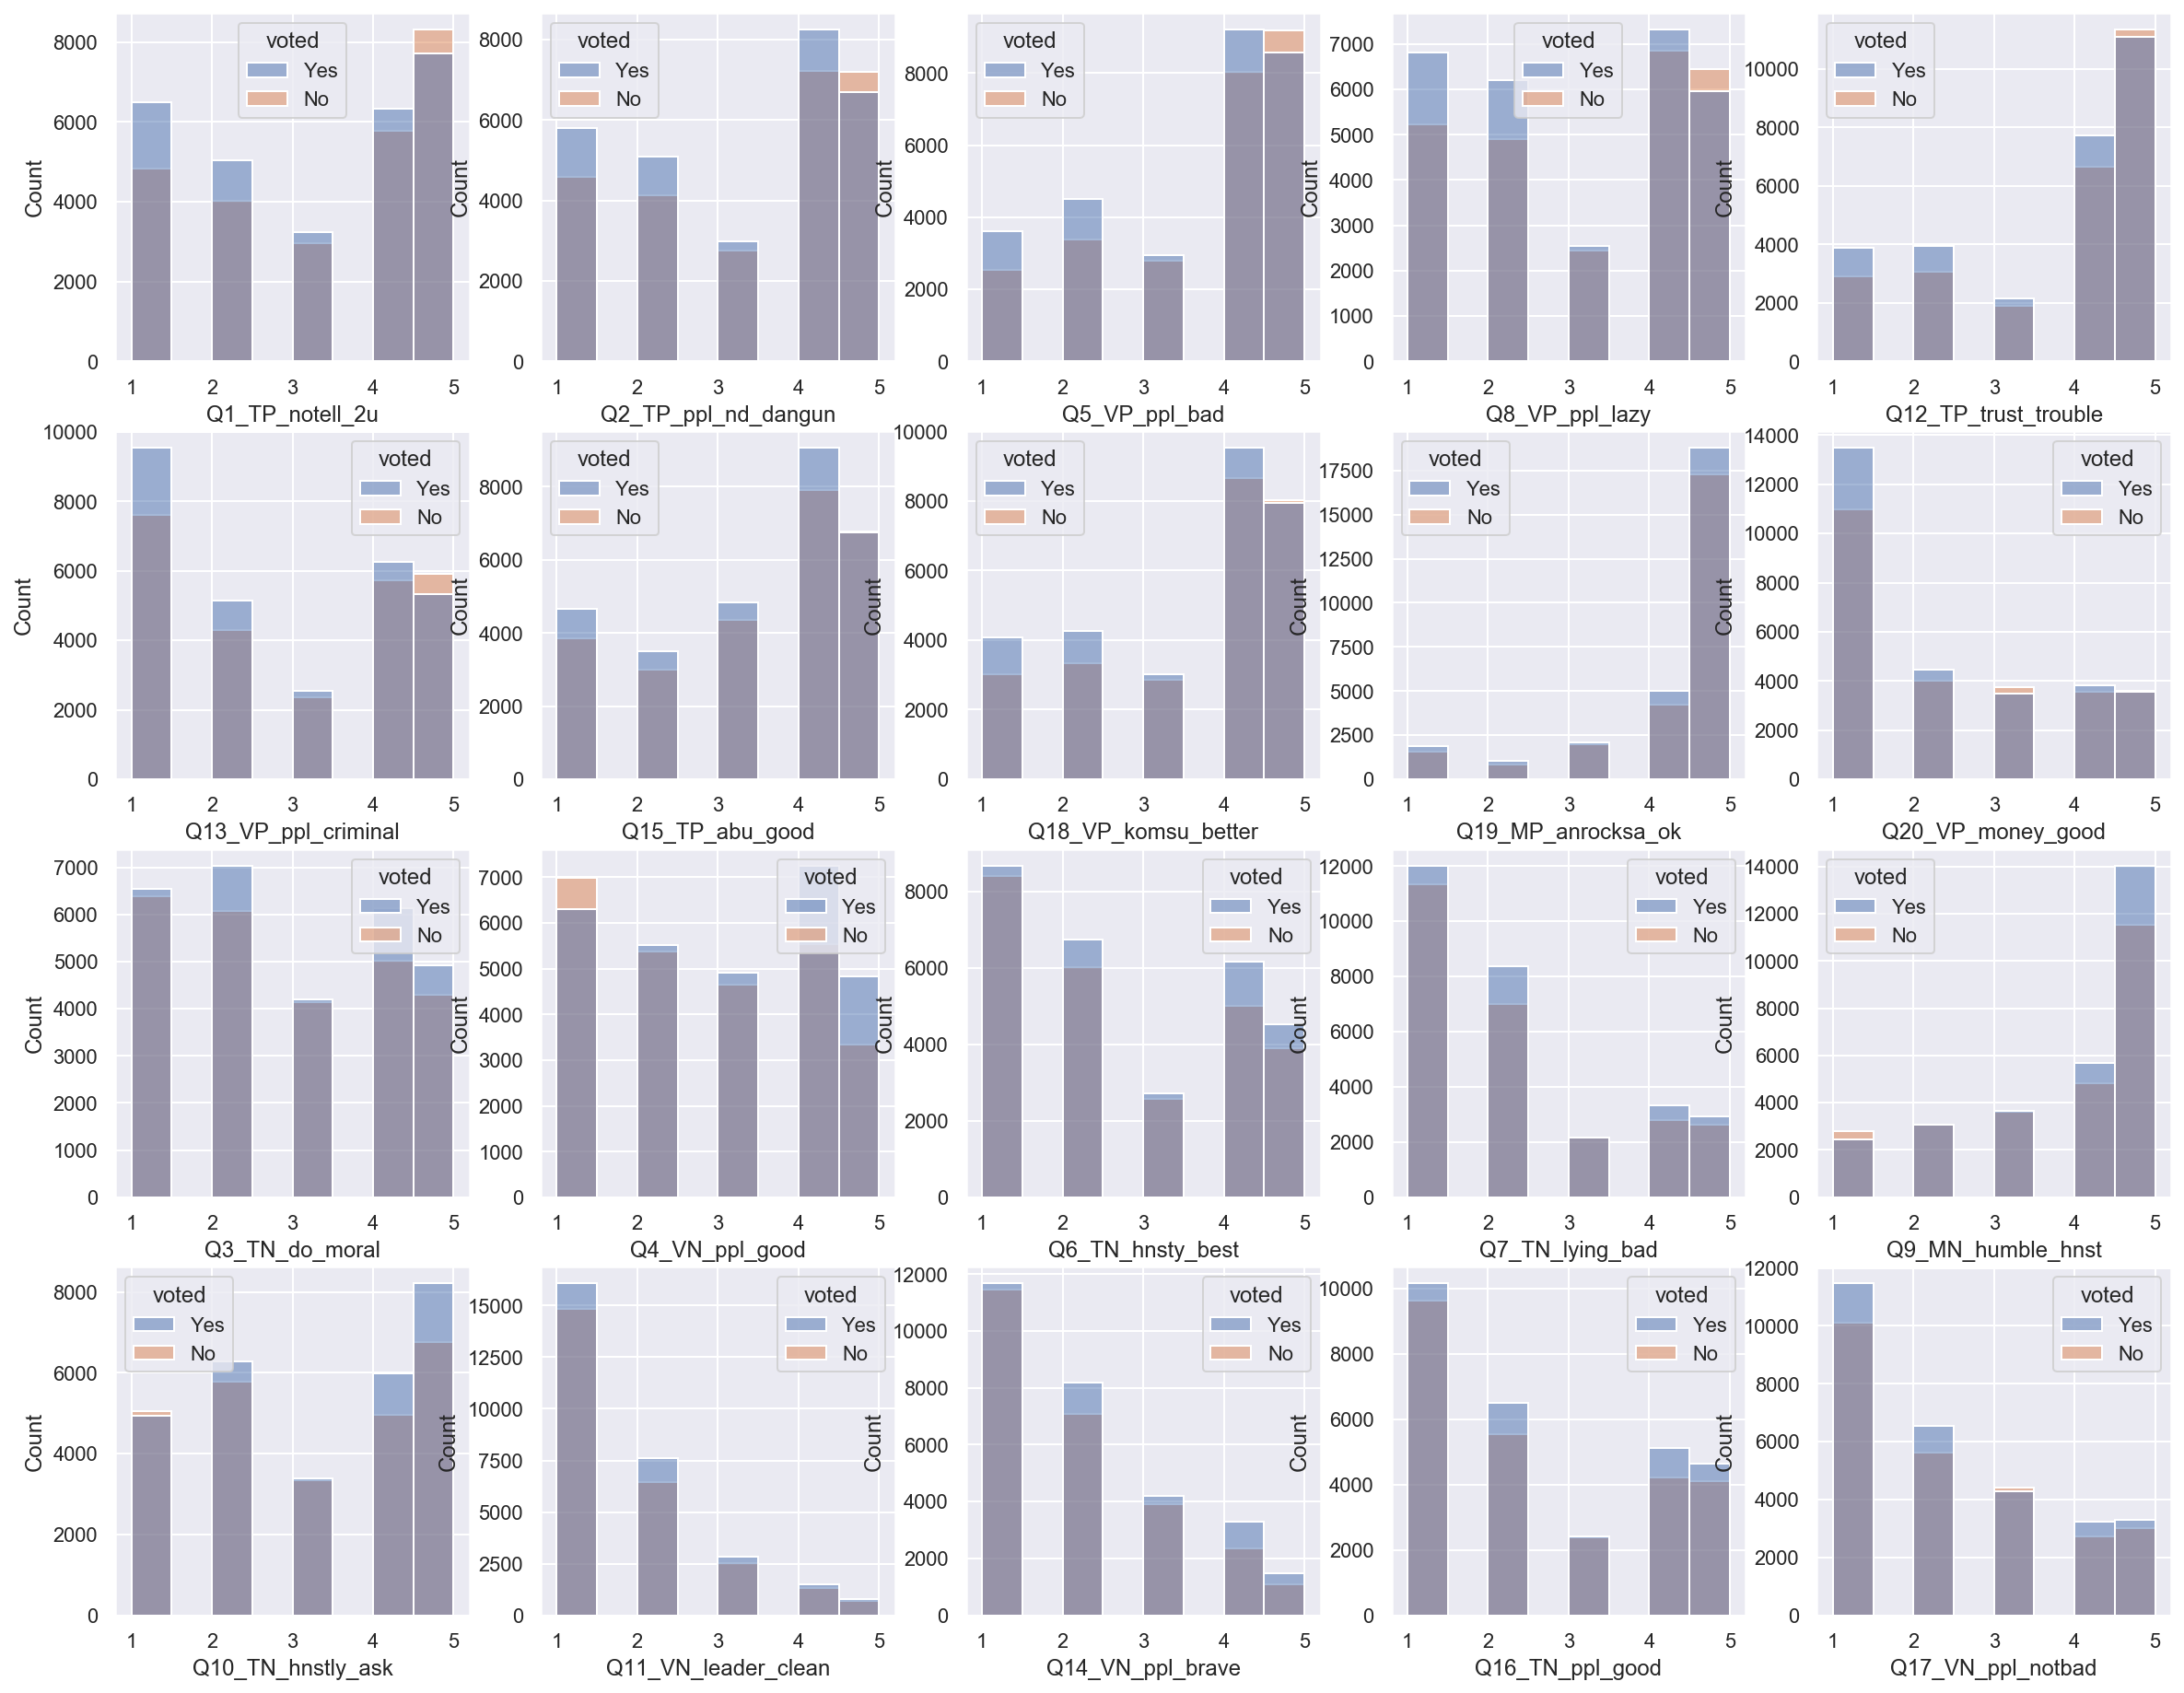

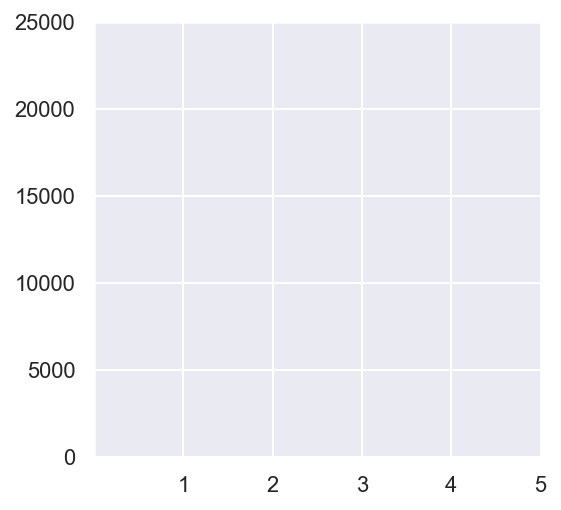

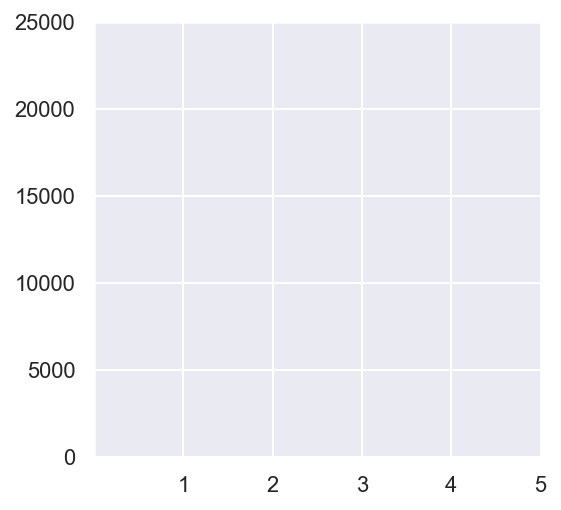

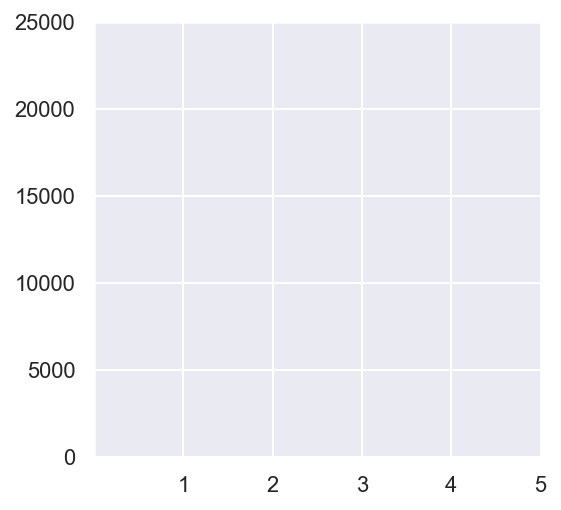

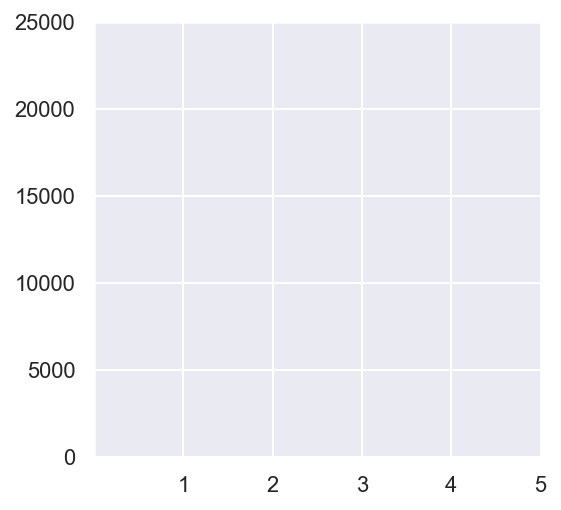

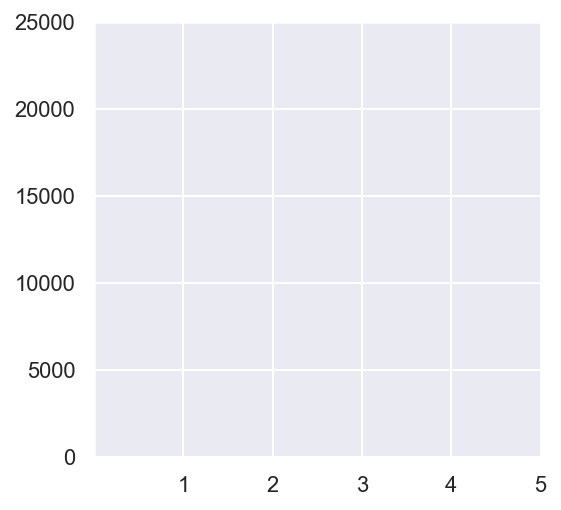

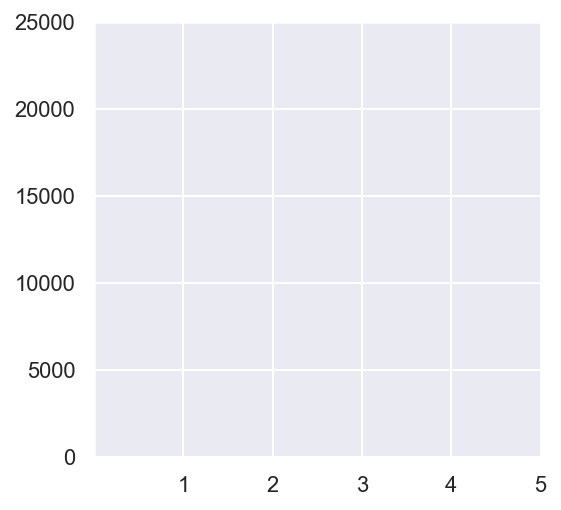

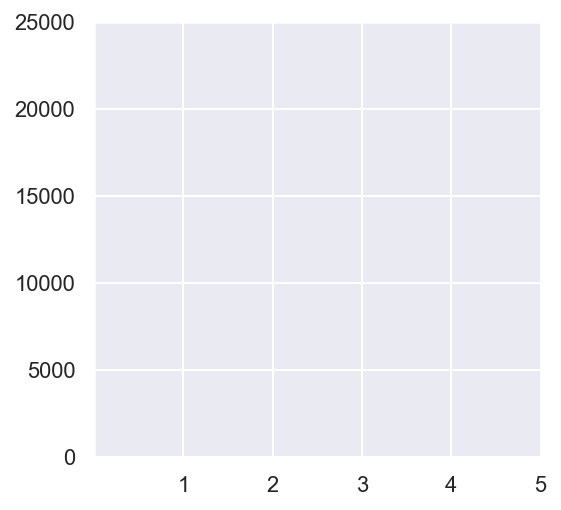

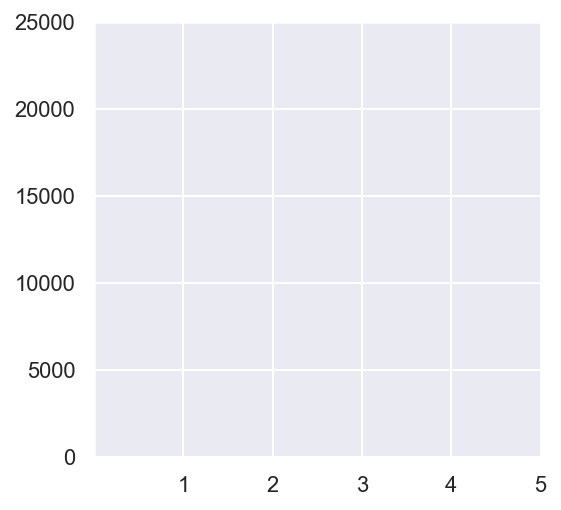

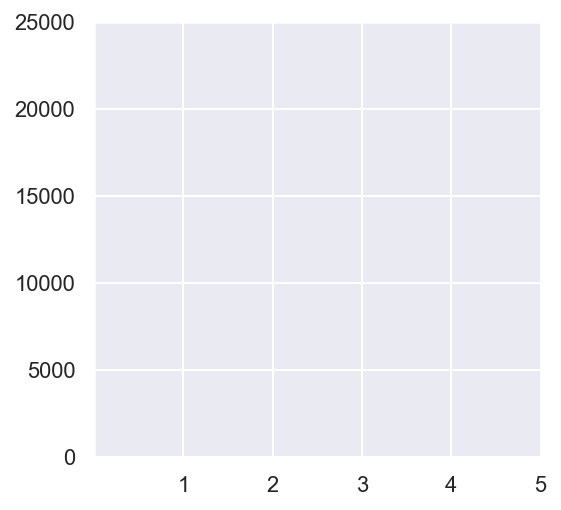

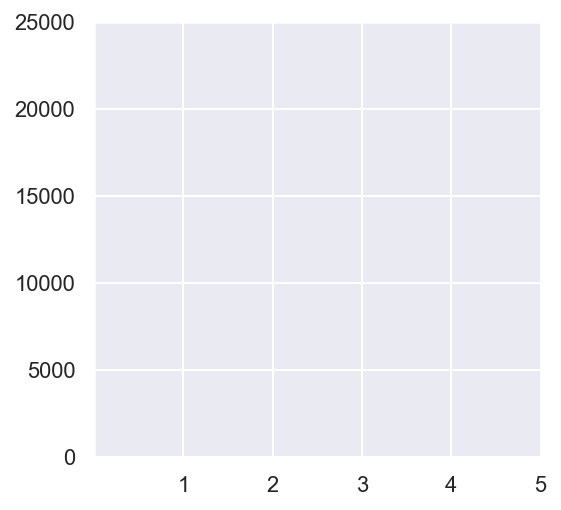

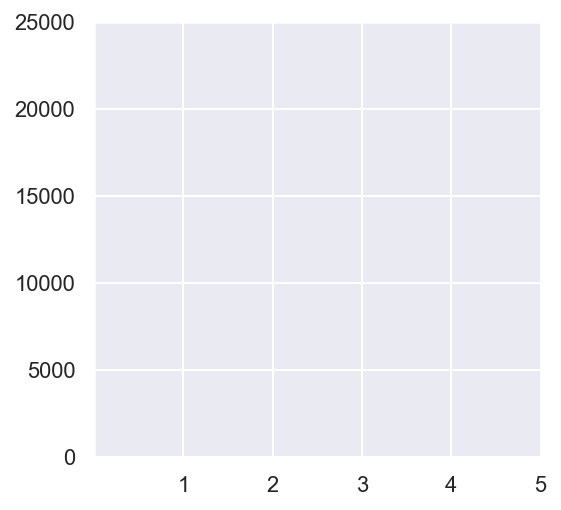

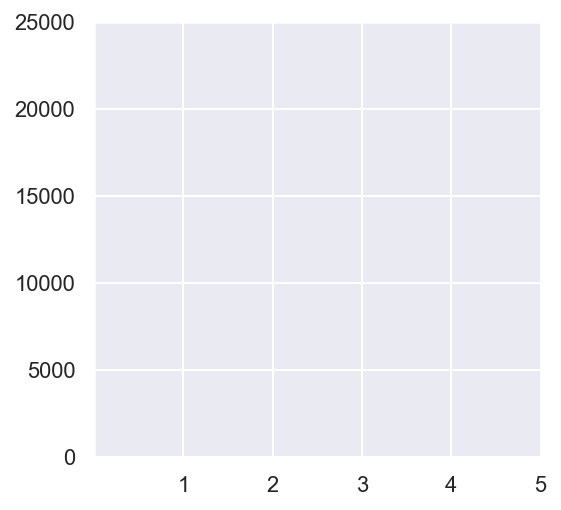

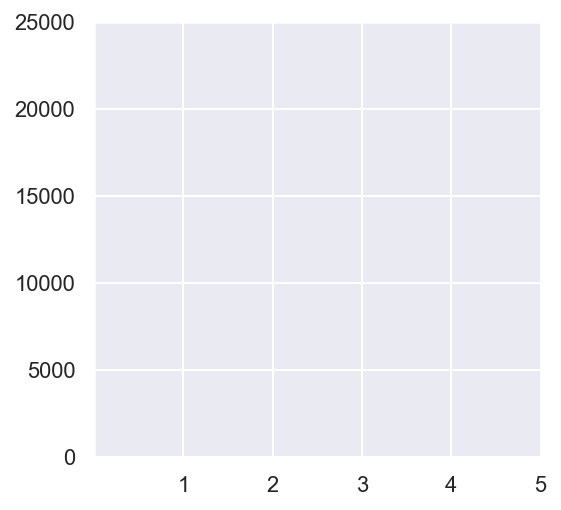

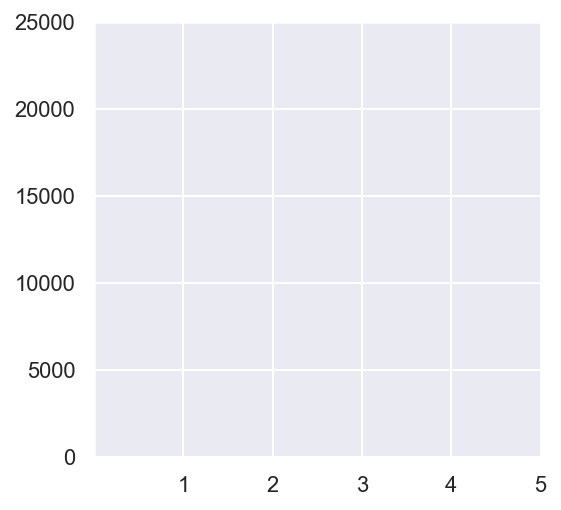

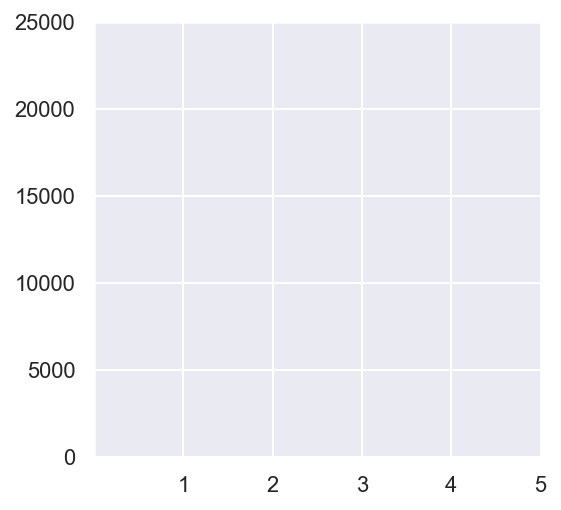

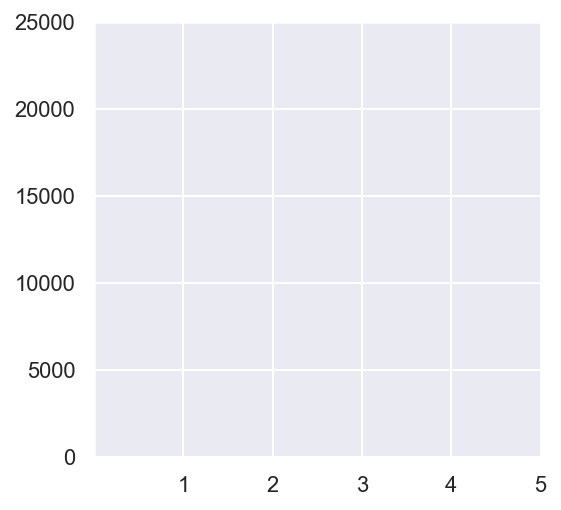

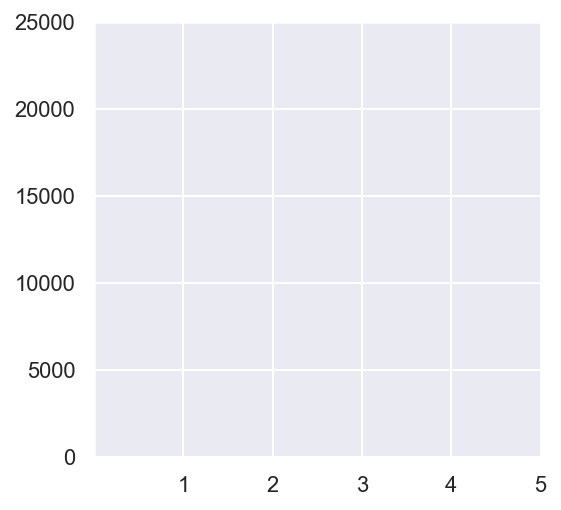

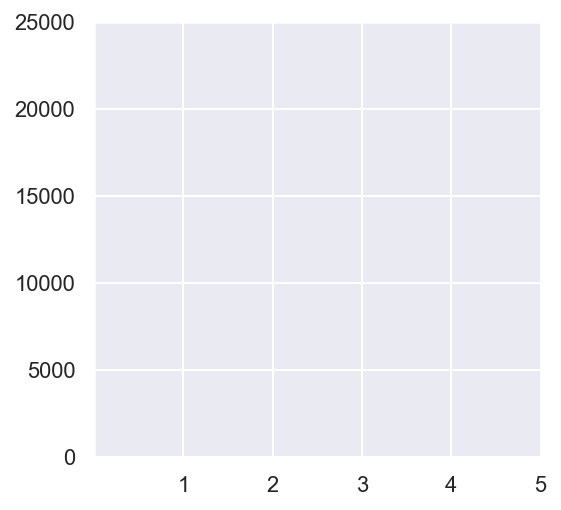

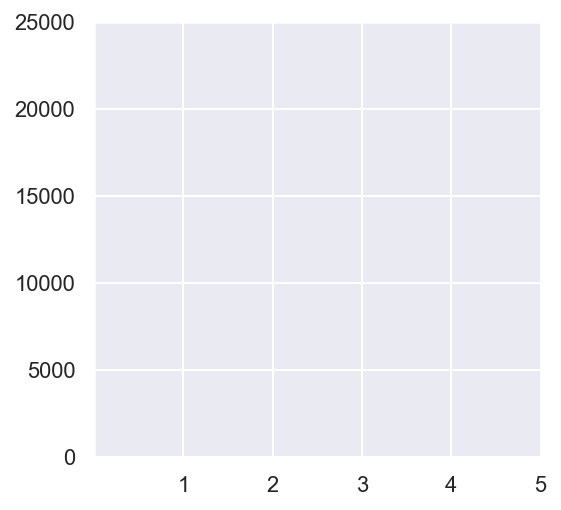

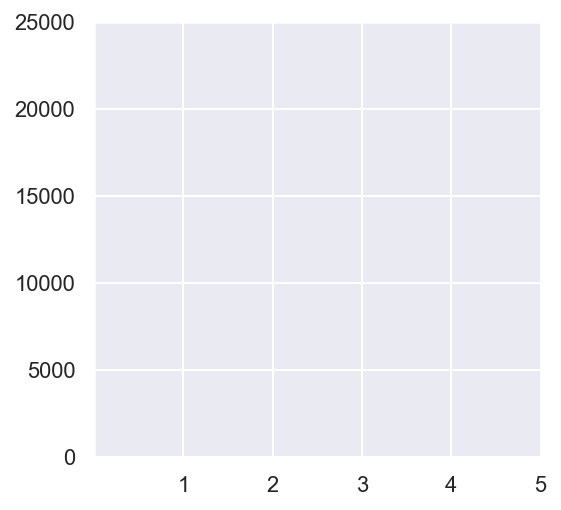

In [112]:
figure, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(nrows=4, ncols=5)
figure.set_size_inches(20,16)

for n, c in enumerate(pos_col):
    ax = globals()["ax" + '{}'.format(n+1)]
    plt.figure(figsize=(4, 4))
    plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
    plt.xticks([1, 2, 3, 4, 5])
    
    sns.histplot(pro_df, x=c, hue='voted', binwidth=0.5, ax=ax)
    
for n, c in enumerate(neg_col):
    ax = globals()["ax" + '{}'.format(n+11)]
    plt.figure(figsize=(4, 4))
    plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
    plt.xticks([1, 2, 3, 4, 5])
    
    sns.histplot(pro_df, x=c, hue='voted', binwidth=0.5, ax=ax)

#### Q18 +

[(0, 25000)]

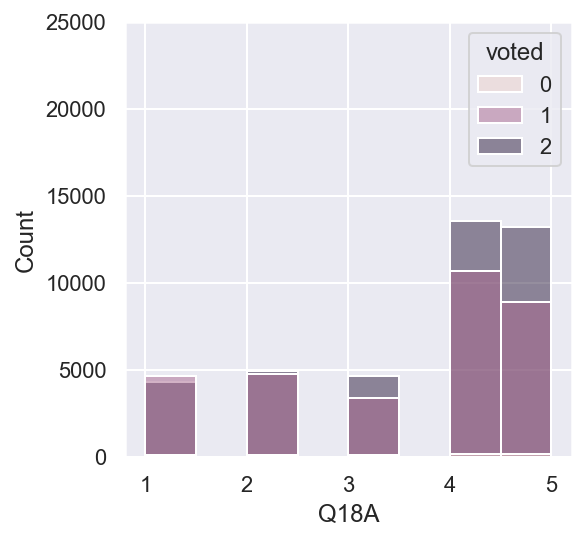

In [84]:
plt.figure(figsize=(4, 4))
plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
plt.xticks([1, 2, 3, 4, 5])
a_plot = sns.histplot(raw_df, x='Q18A', hue='voted', binwidth=0.5)
a_plot.set(ylim=(0, 25000))

#### Q11 -

[(0, 25000)]

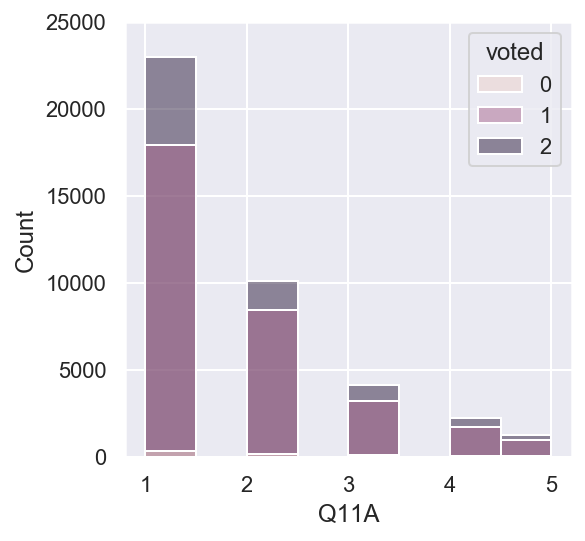

In [85]:
plt.figure(figsize=(4, 4))
plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
plt.xticks([1, 2, 3, 4, 5])
b_plot = sns.histplot(raw_df, x='Q11A', hue='voted', binwidth=0.5)
b_plot.set(ylim=(0, 25000))

#### score

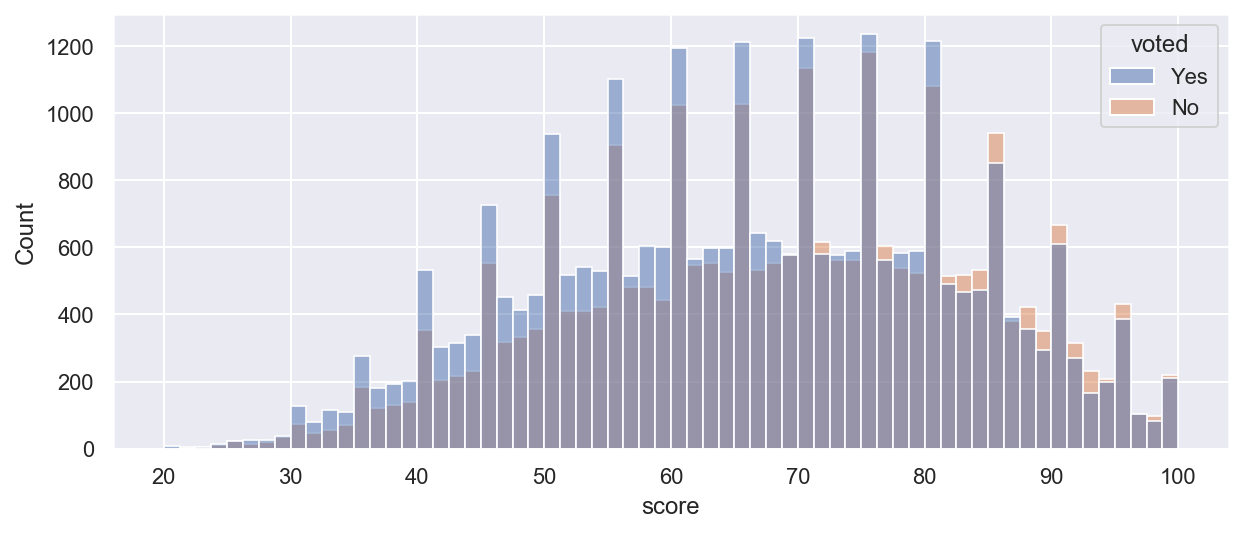

In [29]:
plt.figure(figsize=(10, 4))
sns.histplot(pro_df, x='score', hue='voted')

In [30]:
pro_df["score"].describe()

count    54718.000000
mean        67.076081
std         15.878927
min         20.000000
25%         55.000000
50%         68.000000
75%         79.000000
max        100.000000
Name: score, dtype: float64

In [33]:
len(pro_df[pro_df["score"]<50])/len(pro_df)

0.1544464344457034

### QI

In [115]:
col_list = list(pro_df.columns)
i_col = []

for col in col_list:
    if "I" in col and "Y" not in col:
        i_col.append(col)
print(i_col)

['Q1I', 'Q2I', 'Q3I', 'Q4I', 'Q5I', 'Q6I', 'Q7I', 'Q8I', 'Q9I', 'Q10I', 'Q11I', 'Q12I', 'Q13I', 'Q14I', 'Q15I', 'Q16I', 'Q17I', 'Q18I', 'Q19I', 'Q20I']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


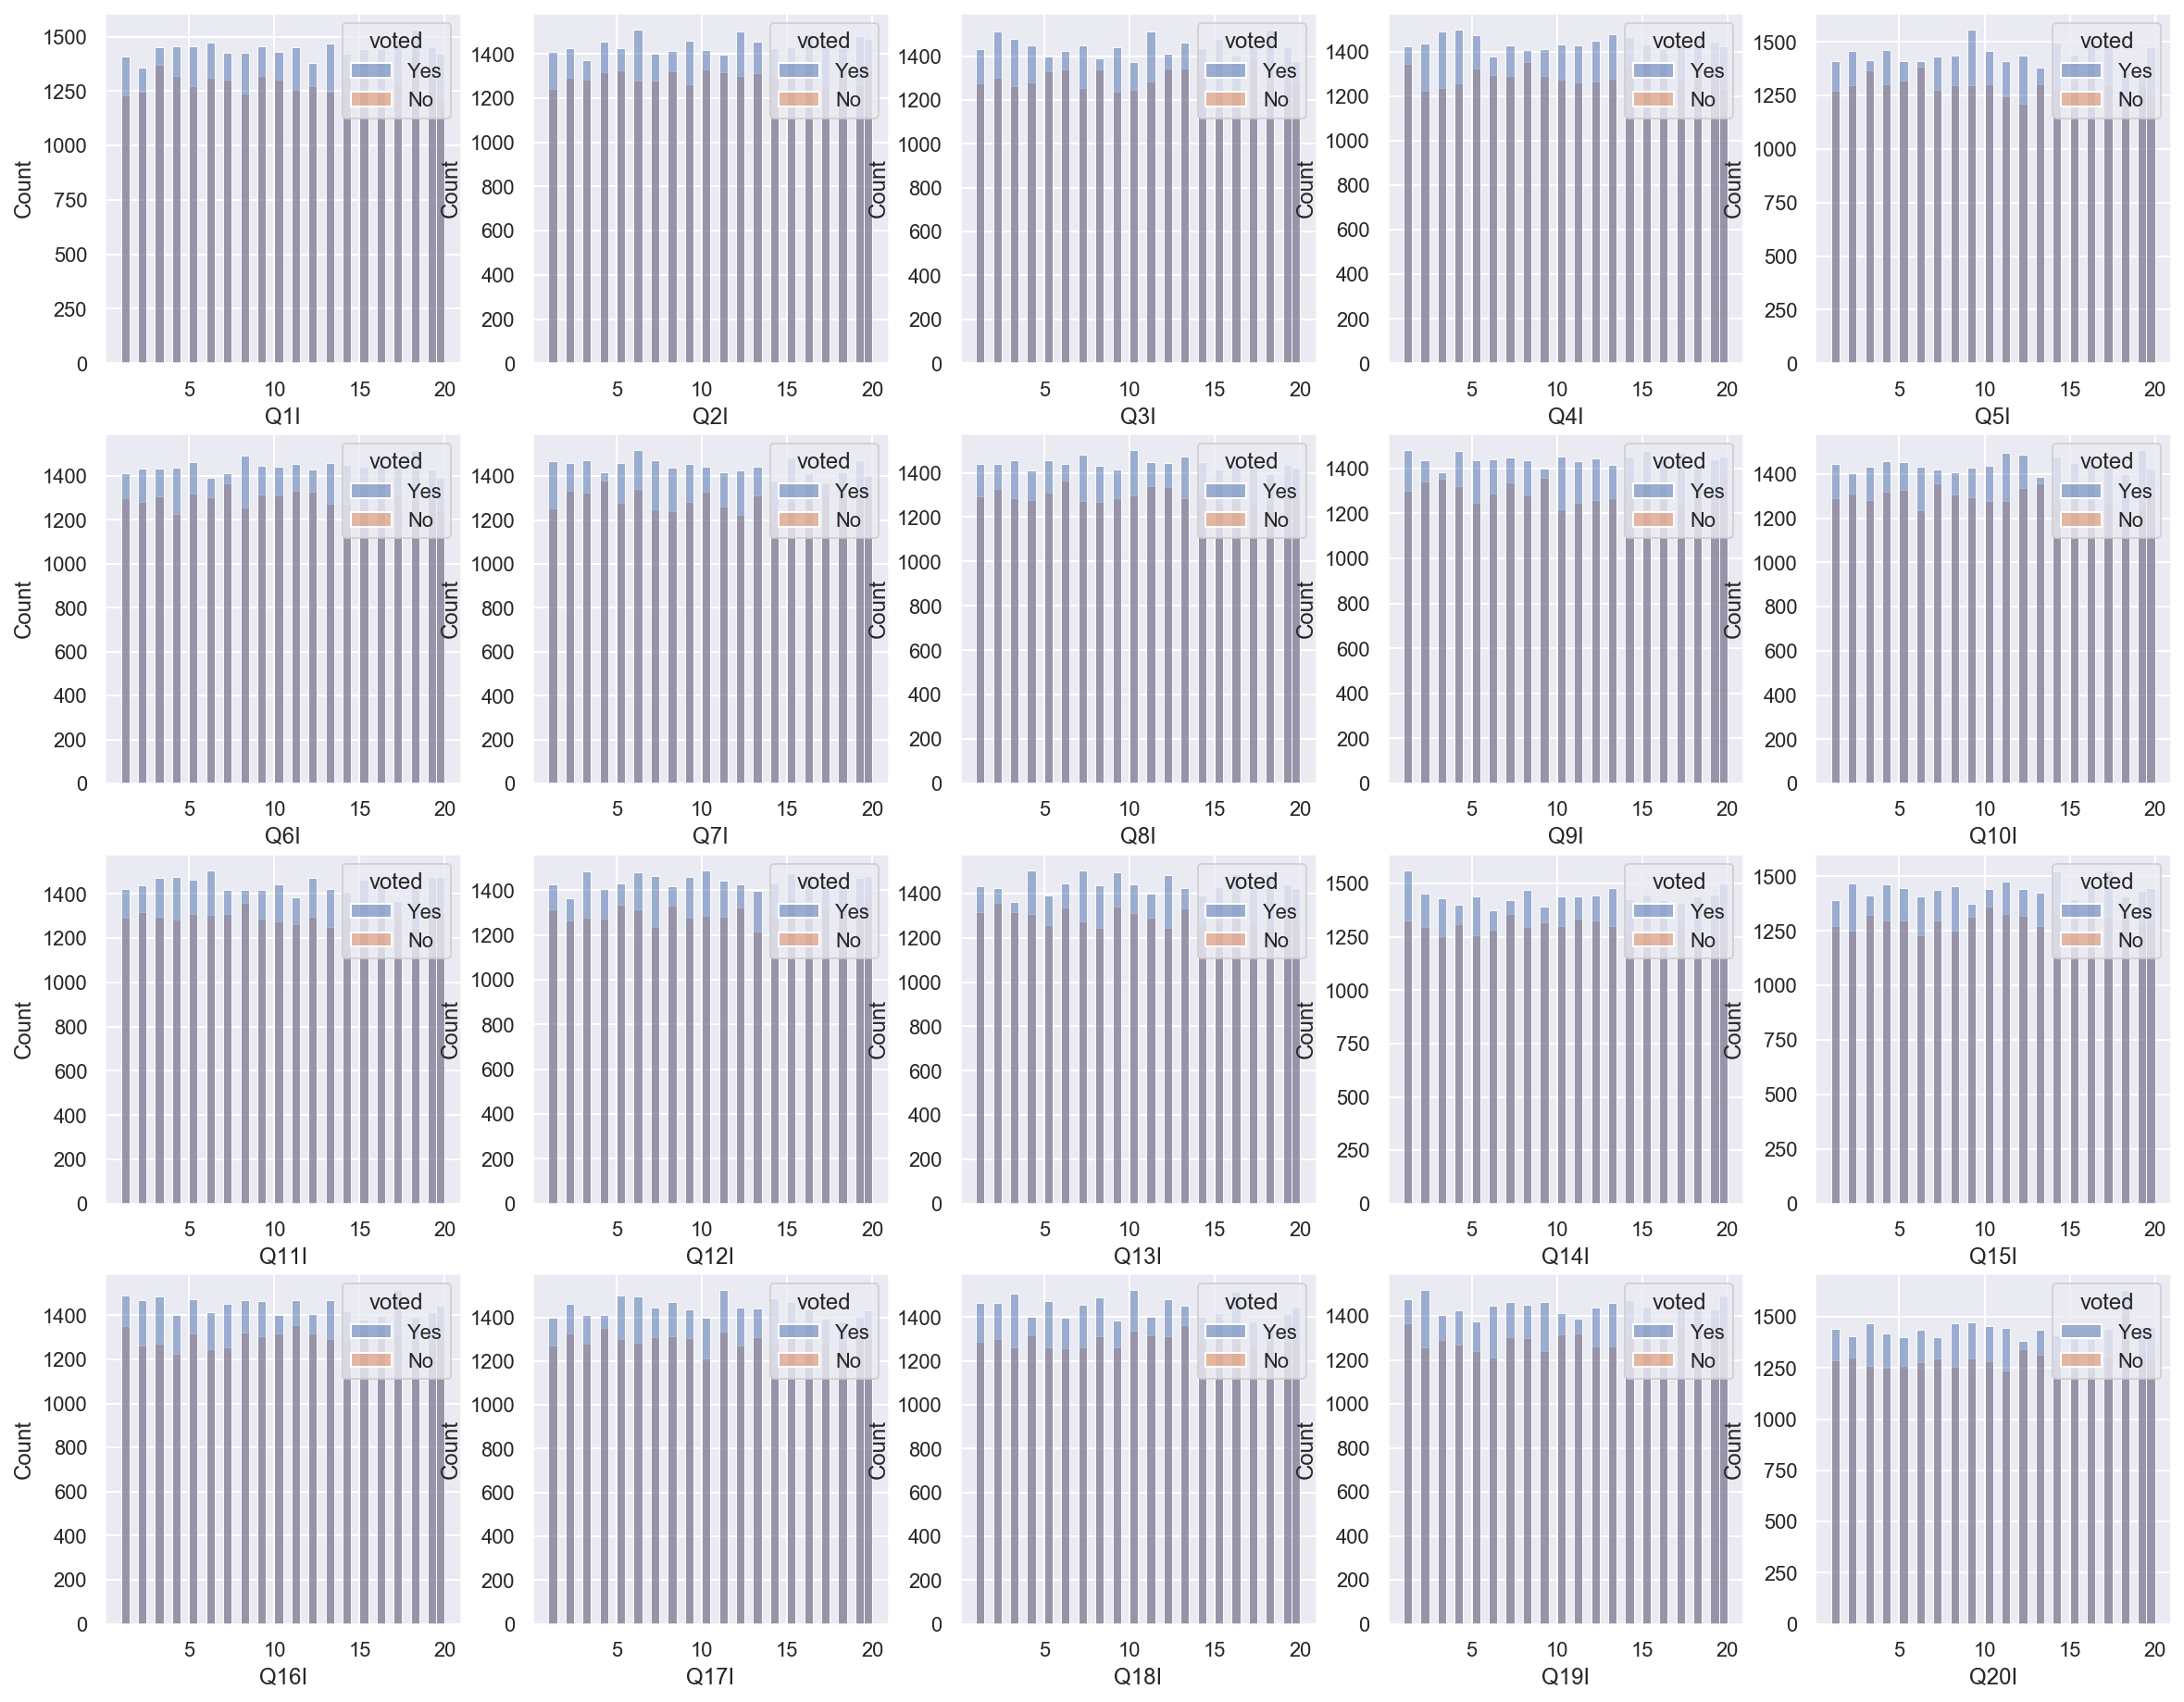

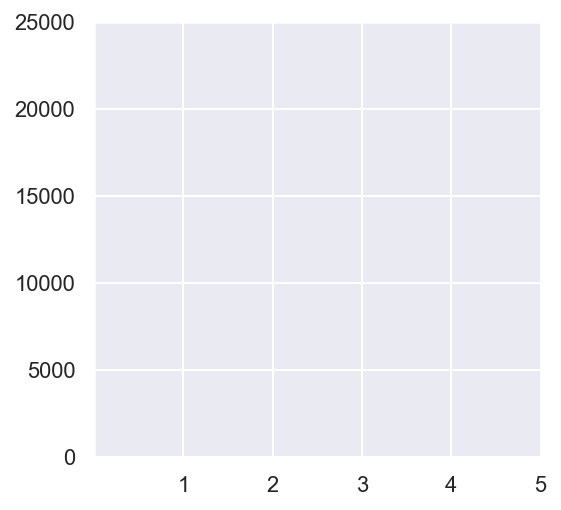

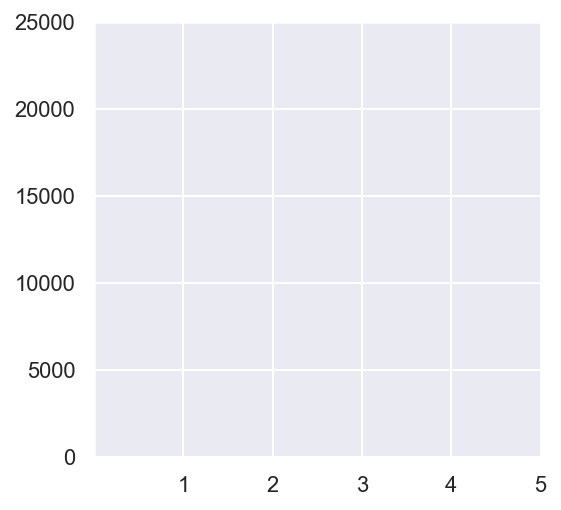

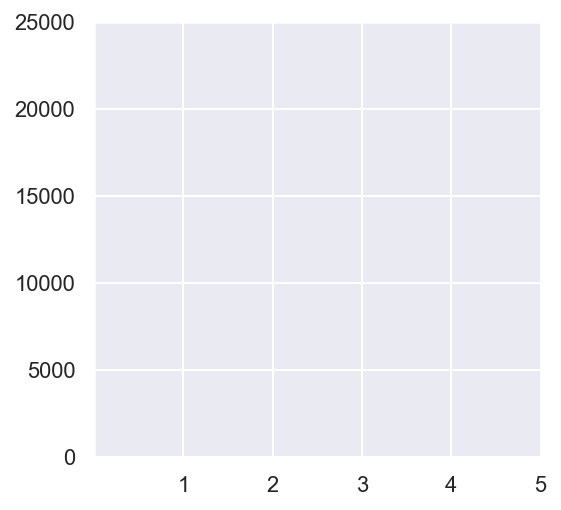

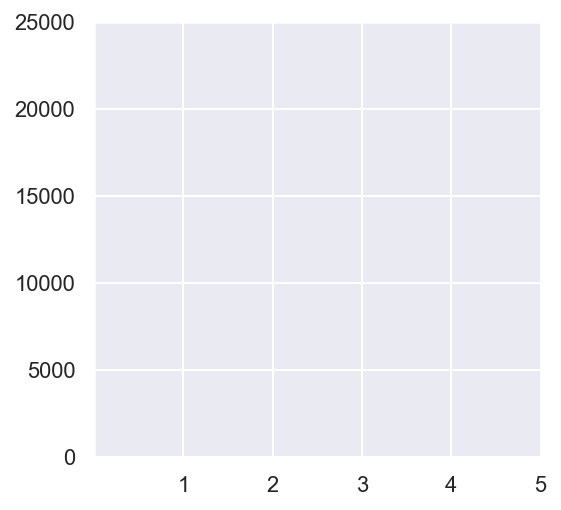

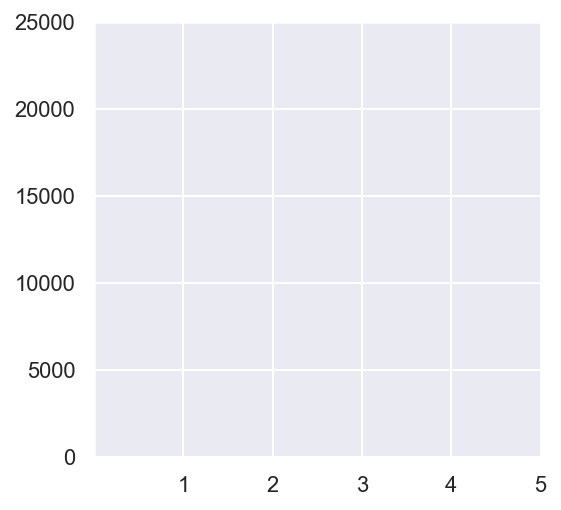

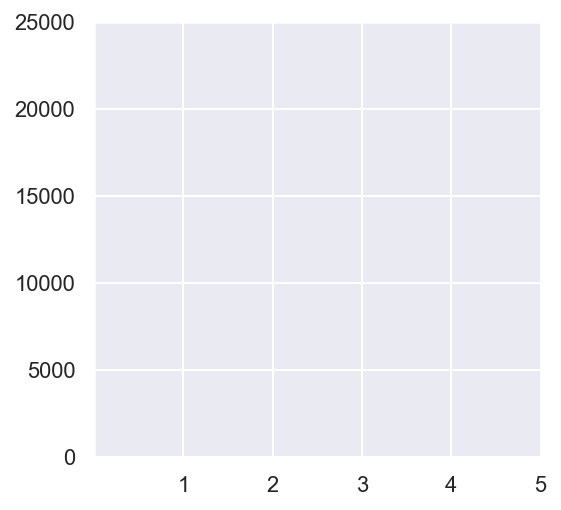

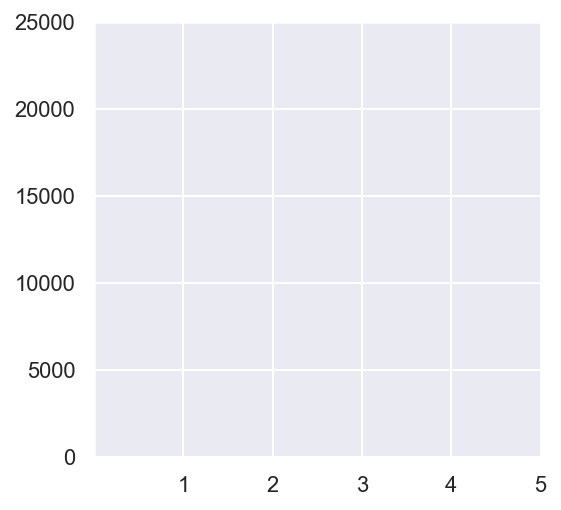

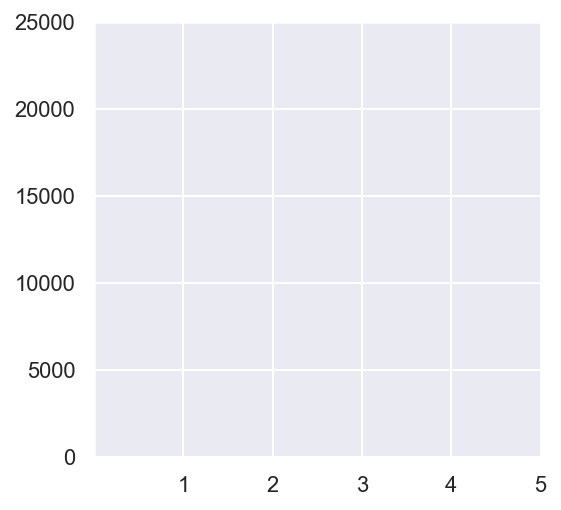

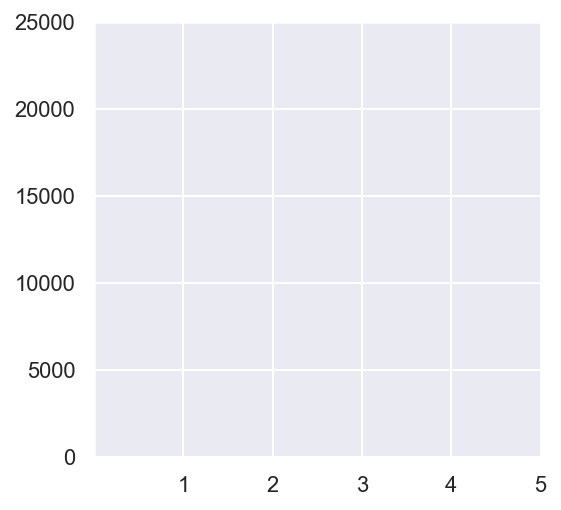

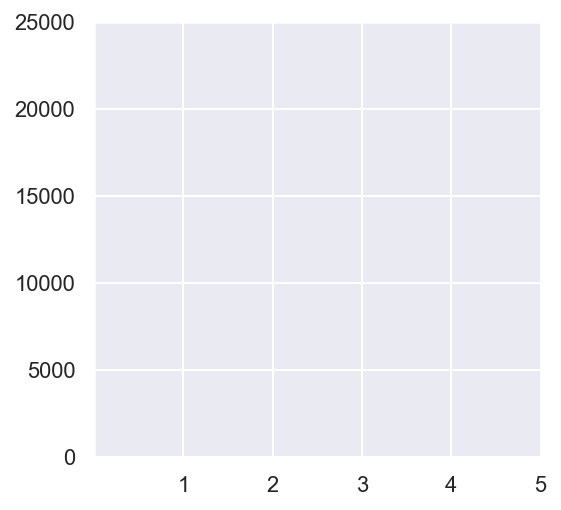

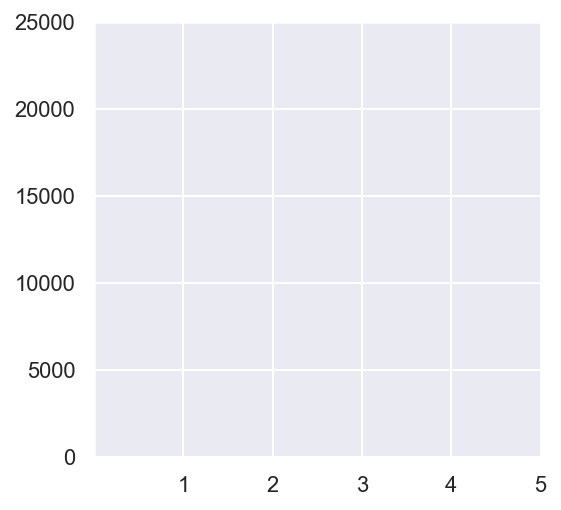

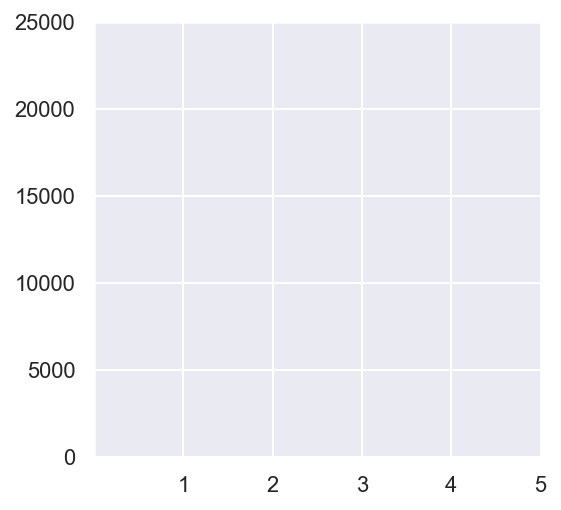

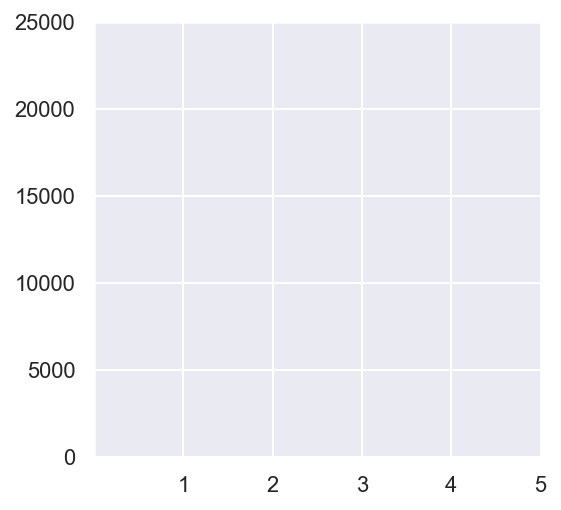

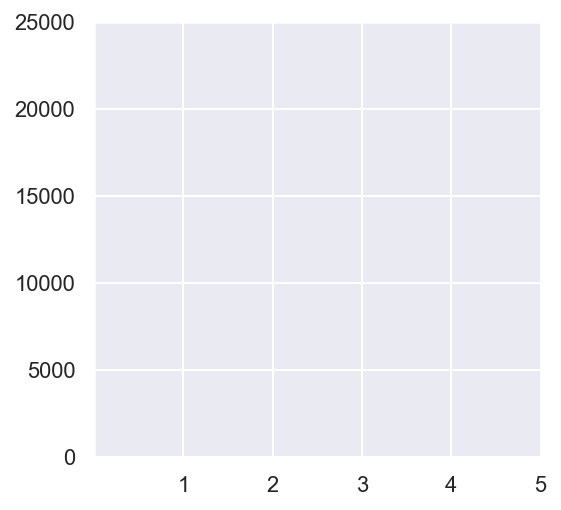

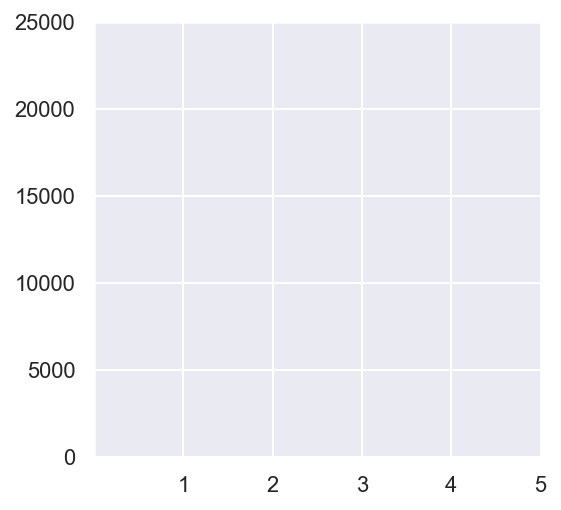

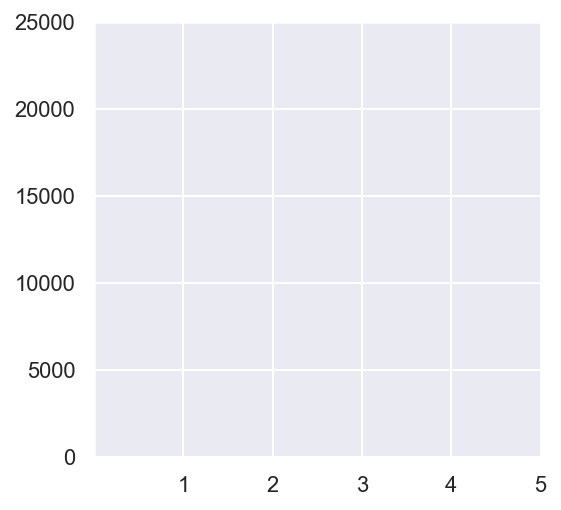

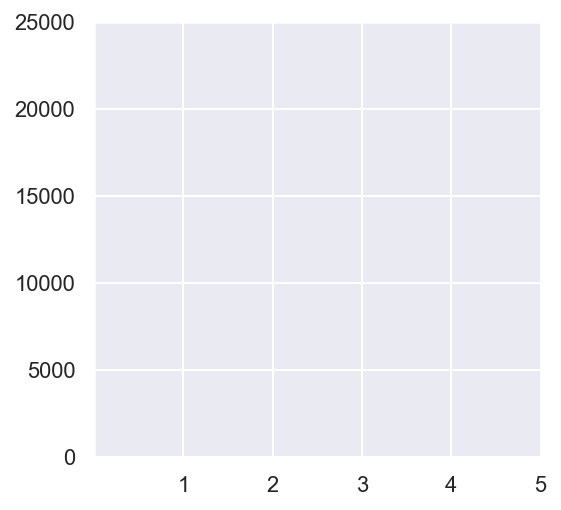

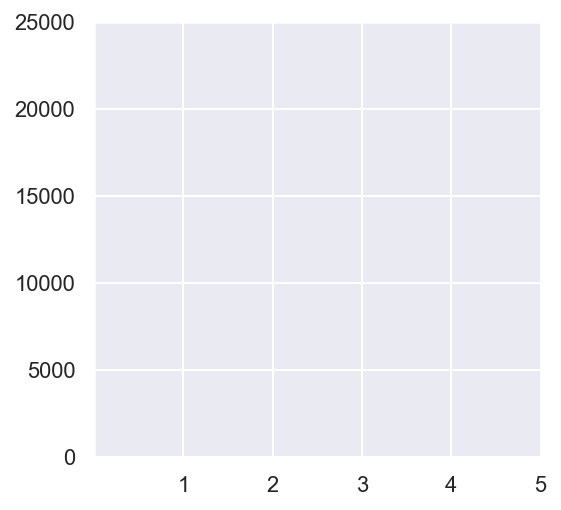

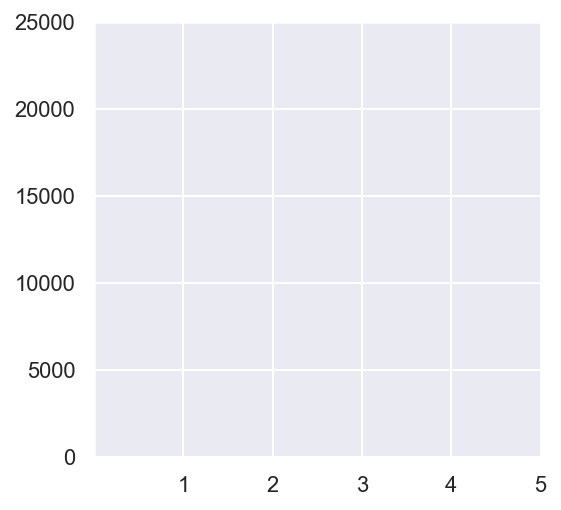

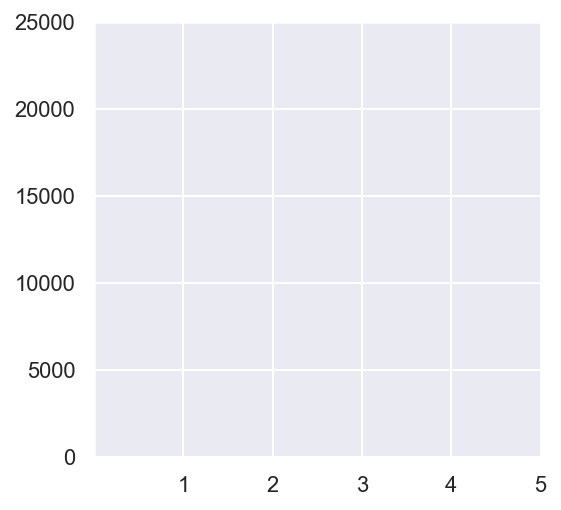

In [117]:
figure, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(nrows=4, ncols=5)
figure.set_size_inches(20,16)

for n, c in enumerate(i_col):
    ax = globals()["ax" + '{}'.format(n+1)]
    plt.figure(figsize=(4, 4))
    plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
    plt.xticks([1, 2, 3, 4, 5])
    
    sns.histplot(pro_df, x=c, hue='voted', binwidth=0.5, ax=ax)

### QE

In [9]:
col_list = list(pro_df.columns)
e_col = []

for col in col_list:
    if "E" in col and "Y" not in col:
        e_col.append(col)
print(e_col)

['Q1E_notell_2u', 'Q2E_ppl_nd_dangun', 'Q3E_do_moral', 'Q4E_ppl_good', 'Q5E_ppl_bad', 'Q6E_hnsty_best', 'Q7E_lying_bad', 'Q8E_ppl_lazy', 'Q9E_humble_hnst', 'Q10E_hnstly_ask', 'Q11E_leader_clean', 'Q12E_trust_trouble', 'Q13E_ppl_criminal', 'Q14E_ppl_brave', 'Q15E_abu_good', 'Q16E_ppl_good', 'Q17E_ppl_notbad', 'Q18E_komsu_better', 'Q19E_anrocksa_ok', 'Q20E_money_good']


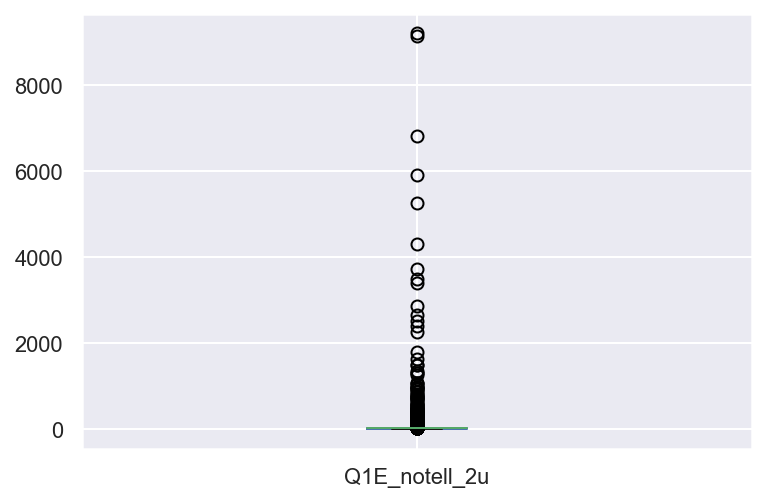

In [22]:
pro_df[pro_df['Q1E_notell_2u']<10000]['Q1E_notell_2u'].plot(kind='box')

In [20]:
pro_df['Q1E_notell_2u'].describe()

count    54718.000000
mean        13.123323
std        163.156663
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max      32310.000000
Name: Q1E_notell_2u, dtype: float64

In [40]:
pd.DataFrame(pro_df[e_col].describe())

,Q1E_notell_2u,Q2E_ppl_nd_dangun,Q3E_do_moral,Q4E_ppl_good,Q5E_ppl_bad,Q6E_hnsty_best,Q7E_lying_bad,Q8E_ppl_lazy,Q9E_humble_hnst,Q10E_hnstly_ask,Q11E_leader_clean,Q12E_trust_trouble,Q13E_ppl_criminal,Q14E_ppl_brave,Q15E_abu_good,Q16E_ppl_good,Q17E_ppl_notbad,Q18E_komsu_better,Q19E_anrocksa_ok,Q20E_money_good
count,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000,54718.000000
mean,13.123323,11.076702,18.526883,7.965478,19.834241,6.992434,11.223765,10.667513,14.423024,30.609745,10.464874,15.134325,16.622610,6.981249,9.143207,9.394733,14.011221,13.385449,24.695840,29.100917
std,163.156663,115.172023,984.348907,108.101739,370.997204,38.846545,400.750012,58.215251,206.805792,861.074211,51.104704,1087.861581,330.076364,111.455116,73.806538,79.903777,116.275219,419.617445,2341.235066,3205.569867
min,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,-2.000000,1.000000,-3574.000000,-8.000000,-3554.000000,1.000000,-40.000000,1.000000,1.000000,1.000000,1.000000,-12.000000,1.000000,-9.000000
25%,5.000000,5.000000,6.000000,3.000000,7.000000,3.000000,4.000000,5.000000,6.000000,9.000000,5.000000,5.000000,6.000000,3.000000,4.000000,4.000000,6.000000,5.000000,6.000000,8.000000
50%,7.000000,6.000000,8.000000,5.000000,9.000000,4.000000,5.000000,7.000000,9.000000,13.000000,7.000000,7.000000,9.000000,4.000000,6.000000,6.000000,8.000000,7.000000,8.000000,10.000000
75%,11.000000,10.000000,12.000000,7.000000,14.000000,7.000000,8.000000,10.000000,13.000000,20.000000,10.000000,10.000000,13.000000,6.000000,8.000000,8.000000,12.000000,10.000000,12.000000,15.000000
max,32310.000000,14948.000000,221153.000000,19766.000000,69370.000000,4480.000000,82346.000000,9901.000000,40985.000000,119251.000000,6254.000000,254156.000000,47758.000000,17162.000000,9006.000000,7989.000000,13439.000000,95517.000000,542805.000000,749602.000000


In [62]:
num = pro_df[c]
minn = num.min()
iqr_25 = num.quantile(.25)
iqr_50 = num.quantile(.5)
iqr_75 = num.quantile(.75)
maxx = num.quantile(1)

def time(x):
    if x <= minn:
        return minn
    elif x<=iqr_25:
        return iqr_25
    elif x<=iqr_50:
        return iqr_50
    elif x<=iqr_75:
        return iqr_75
    else:
        return maxx

In [63]:
pro_df["test"] = pro_df["Q1E_notell_2u"].apply(lambda x: time(x))

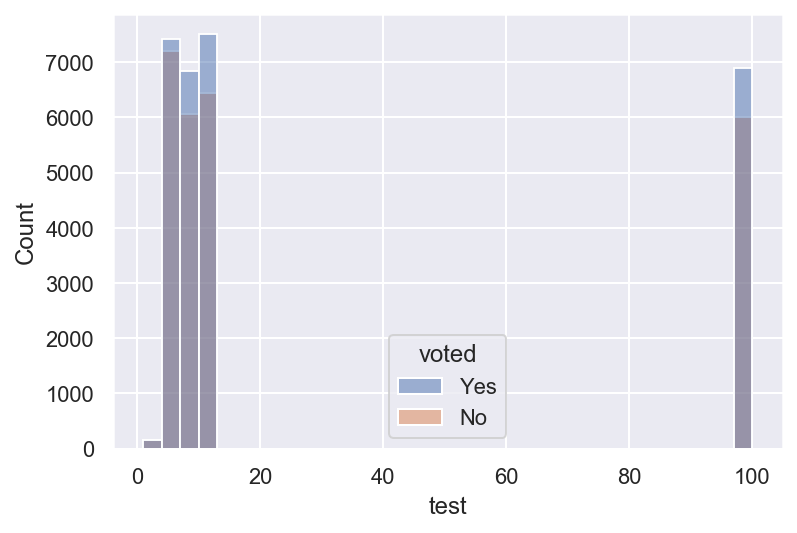

In [66]:
sns.histplot(pro_df, x=c, hue='voted', binwidth=3)

In [ ]:
figure, ((ax1,ax2,ax3,ax4,ax5), (ax6,ax7,ax8,ax9,ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(nrows=4, ncols=5)
figure.set_size_inches(20,16)

for n, c in enumerate(e_col):
    ax = globals()["ax" + '{}'.format(n+1)]
    plt.figure(figsize=(4, 4))
    plt.yticks([0, 5000, 10000, 15000, 20000, 25000])
    plt.xticks([1, 2, 3, 4, 5])
    
    sns.histplot(pro_df, x=c, hue='voted', binwidth=0.5, ax=ax)